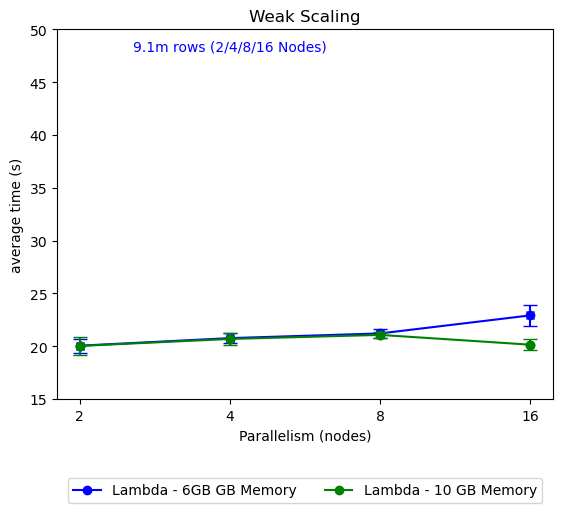

In [18]:
import matplotlib.pyplot as plt

# Given data
world_size = ['2', '4', '8', '16']
lambda_10GB = [20.03076804, 20.69381972, 21.07601555, 20.14870176]
lambda_6GB = [20.05292544, 20.77114639, 21.21451118, 22.92575049 ]



lambda_10GB_err = [0.8356659236, 0.5303307103, 0.259753258, 0.5288880707]
lambda_6GB_err = [0.6816772169, 0.488337019, 0.429582007, 0.9709855563]



# Create a line chart
plt.plot(world_size, lambda_6GB, marker='o', color='b', label='Lambda - 6GB GB Memory')
plt.plot(world_size, lambda_10GB, marker='o', color='g', label='Lambda - 10 GB Memory')


plt.errorbar(world_size, lambda_6GB, yerr=lambda_6GB_err, fmt='x', color='b', ecolor='b', capsize=5)
plt.errorbar(world_size, lambda_10GB, yerr=lambda_10GB_err, fmt='o', color='g', ecolor='g', capsize=5)


custom_text = "9.1m rows (2/4/8/16 Nodes)"
plt.text(1, 48, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(15, 50)

plt.xticks(world_size)

# Add labels and title
plt.xlabel('Parallelism (nodes)')
plt.ylabel('average time (s)')
plt.title('Weak Scaling')

# Add a legend
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-w-scaling.svg', format='svg')

# Display the chart
plt.show()


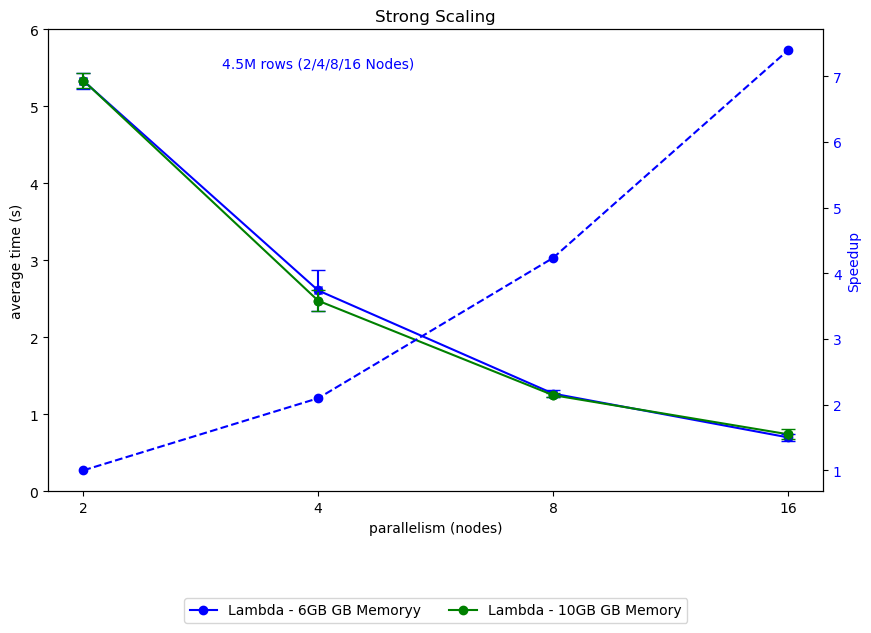

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
world_size = ['2', '4', '8', '16']
lambda_10GB = [5.335469663, 2.475117937, 1.249511041, 0.7414773665]
lambda_6GB= [5.331662387, 2.60870406, 1.269696467, 0.7010446712]


# Combine all datasets into a single array for averaging
datasets = np.array([
   lambda_10GB,
   lambda_6GB 
])

# Calculate the average execution time for each number of nodes
avg_execution_time = np.mean(datasets, axis=0)

# Calculate speedup (S_p = T_1 / T_p)
speedup = avg_execution_time[0] / avg_execution_time  # Baseline is avg_execution_time[0]
speedup[0] = 1  # Speedup for a single node is always 1




lambda_10GB8_err = [0.0982287878, 0.136204437, 0.02171586327, 0.06490249175]
lambda_6GB_err = [0.1004838776, 0.2687386219, 0.0502177742, 0.04703823834]


fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a line chart
ax1.plot(world_size, lambda_6GB, marker='o', color='b', label='Lambda - 6GB GB Memoryy')
ax1.plot(world_size, lambda_10GB, marker='o', color='g', label='Lambda - 10GB GB Memory')



ax1.errorbar(world_size, lambda_6GB, yerr=lambda_6GB_err, fmt='x', color='b', ecolor='b', capsize=5)
ax1.errorbar(world_size, lambda_10GB, yerr=lambda_10GB8_err, fmt='o', color='g', ecolor='g', capsize=5)


custom_text = "4.5M rows (2/4/8/16 Nodes)"
ax1.text(1, 5.5, custom_text, fontsize=10, color='blue', ha='center')

plt.ylim(0, 6)

plt.xticks(world_size)

# Add labels and title
ax1.set_xlabel('parallelism (nodes)')
ax1.set_ylabel('average time (s)')
ax1.set_title('Strong Scaling')


# Add a second y-axis for speedup
ax2 = ax1.twinx()
ax2.plot(world_size, speedup, 'o--', color='blue', label='Speedup (Avg)')
ax2.set_ylabel('Speedup', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Add a legend
ax1.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2) 

plt.savefig('join-s-scaling.svg', format='svg')

# Display the chart
plt.show()